In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bitan009","key":"5439b0fa03f289c10a5fb62f5f119ddb"}'}

In [ ]:
# Install Kaggle API and download the dataset
!pip install kaggle
import os
import shutil
from sklearn.model_selection import train_test_split

# ✅ Setup Kaggle API (Upload kaggle.json before running this)
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
os.chmod("/root/.kaggle/kaggle.json", 600)

# ✅ Download PlantVillage dataset
!kaggle datasets download -d emmarex/plantdisease
!unzip plantdisease.zip -d ./PlantVillage

# ✅ Fix dataset structure (Check for nested folders)
dataset_root = "./PlantVillage"
subdirs = os.listdir(dataset_root)

if "PlantVillage" in subdirs:
    dataset_root = os.path.join(dataset_root, "PlantVillage")  # Correct path

print("Final Dataset Path:", dataset_root)
print("Categories Found:", os.listdir(dataset_root))

# ✅ Structure dataset into train, validation, test folders
structured_dir = "./Structured_PlantVillage"
if os.path.exists(structured_dir):
    shutil.rmtree(structured_dir)  # Remove previous structure if exists
os.makedirs(structured_dir, exist_ok=True)

for split in ["train", "validation", "test"]:
    os.makedirs(os.path.join(structured_dir, split), exist_ok=True)

# ✅ Split images correctly
for category in os.listdir(dataset_root):
    category_path = os.path.join(dataset_root, category)

    if os.path.isdir(category_path):  # Only process directories
        images = os.listdir(category_path)

        if len(images) > 1:
            train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
            train_images, test_images = train_test_split(train_images, test_size=0.2, random_state=42)

            for split, img_list in zip(["train", "validation", "test"], [train_images, val_images, test_images]):
                split_dir = os.path.join(structured_dir, split, category)
                os.makedirs(split_dir, exist_ok=True)

                for img in img_list:
                    src_path = os.path.join(category_path, img)
                    dest_path = os.path.join(split_dir, img)

                    if os.path.exists(src_path):
                        shutil.move(src_path, dest_path)

print("✅ Dataset restructuring completed!")

# ✅ Verify if all categories are present
print("Train Categories:", os.listdir("./Structured_PlantVillage/train"))
print("Validation Categories:", os.listdir("./Structured_PlantVillage/validation"))
print("Test Categories:", os.listdir("./Structured_PlantVillage/test"))


Streaming output truncated to the last 5000 lines.
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/092330d8-f6e9-48df-8525-cb391b8f00b7___YLCV_GCREC 2930.JPG  
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09266523-41f5-42cd-bf15-5f13a6cec876___UF.GRC_YLCV_Lab 02419.JPG  
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09320877-b96e-46ea-b1d3-6f915d60180f___UF.GRC_YLCV_Lab 02550.JPG  
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09397385-9a50-4d0a-bc52-bccfd6aa7c59___UF.GRC_YLCV_Lab 01763.JPG  
  inflating: ./PlantVillage/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0943c5de-fb84-4206-8b36-c4cd6f8cae90___UF.GRC_YLCV_Lab 03374.JPG  
  infla

Found 13196 images belonging to 15 classes.
Found 4134 images belonging to 15 classes.
Found 3308 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.2810 - loss: 2.2137 - val_accuracy: 0.6147 - val_loss: 1.1787
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 75s 182ms/step - accuracy: 0.6152 - loss: 1.1587 - val_accuracy: 0.6679 - val_loss: 0.9866
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 77s 186ms/step - accuracy: 0.7076 - loss: 0.8574 - val_accuracy: 0.6604 - val_loss: 1.0742
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.7430 - loss: 0.7279 - val_accuracy: 0.7433 - val_loss: 0.7668
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 75s 183ms/step - accuracy: 0.7774 - loss: 0.6450 - val_accuracy: 0.7121 - val_loss: 0.9171
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 75s 182ms/step - accuracy: 0.7935 - loss: 0.5891 - val_accuracy: 0.7692 - val_loss: 0.7375
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 76s 183ms/step - accuracy: 0.8154 - loss: 0.5585 - val_accuracy: 0.8442 - val_loss: 0.4611
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 76s 185ms/step - accuracy: 0.8342 - loss: 0

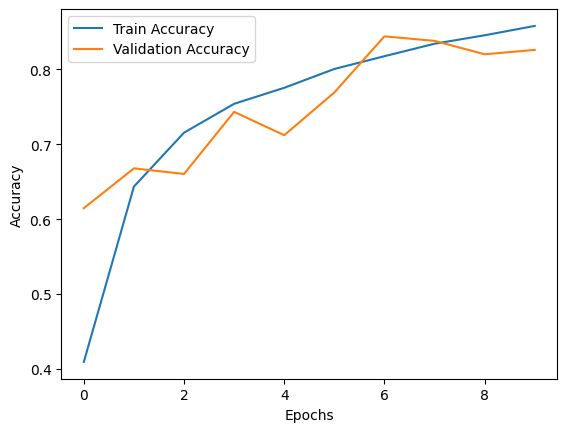

104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8613 - loss: 0.4953
Test Accuracy: 83.56%


104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset paths
structured_dir = "./Structured_PlantVillage"
train_dir = os.path.join(structured_dir, "train")
val_dir = os.path.join(structured_dir, "validation")
test_dir = os.path.join(structured_dir, "test")

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator)

# Save Model
model.save("plant_disease_model.h5")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evaluation
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Load Model for Prediction
model = tf.keras.models.load_model("plant_disease_model.h5")

# Predict on Test Data
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get Class Labels
class_labels = list(train_generator.class_indices.keys())

# Print Some Predictions
for i in range(5):  # Show 5 sample predictions
    print(f"Actual: {class_labels[np.argmax(test_generator.labels[i])]}, Predicted: {class_labels[predicted_classes[i]]}")


104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot, Remedy: Use copper-based fungicides and avoid overhead watering.
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot, Remedy: Use copper-based fungicides and avoid overhead watering.
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot, Remedy: Use copper-based fungicides and avoid overhead watering.
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot, Remedy: Use copper-based fungicides and avoid overhead watering.
Actual: Pepper__bell___Bacterial_spot, Predicted: Pepper__bell___Bacterial_spot, Remedy: Use copper-based fungicides and avoid overhead watering.


Saving Halo-2-3-1080x675.jpg to Halo-2-3-1080x675.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


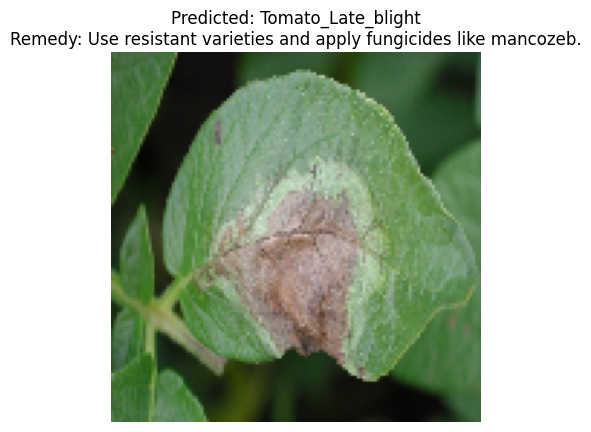

Predicted Disease: Tomato_Late_blight
Recommended Remedy: Use resistant varieties and apply fungicides like mancozeb.


In [ ]:
model = tf.keras.models.load_model("plant_disease_model.h5")

# Define Disease Remedies
disease_remedies = {
    "Pepper__bell___Bacterial_spot": "Use copper-based fungicides and avoid overhead watering.",
    "Pepper__bell___healthy": "No disease detected. Maintain proper care.",
    "Potato___Early_blight": "Apply fungicides containing chlorothalonil or copper-based sprays.",
    "Potato___Late_blight": "Use resistant varieties and apply fungicides like mancozeb.",
    "Potato___healthy": "No disease detected. Maintain proper care.",
    "Tomato_Bacterial_spot": "Use copper-based bactericides and ensure proper spacing between plants.",
    "Tomato_Early_blight": "Apply fungicides containing chlorothalonil and remove infected leaves.",
    "Tomato_Late_blight": "Use resistant varieties and apply fungicides like mancozeb.",
    "Tomato_Leaf_Mold": "Increase ventilation and use fungicides like chlorothalonil.",
    "Tomato_Septoria_leaf_spot": "Remove affected leaves and apply copper-based fungicides.",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Use insecticidal soap or neem oil.",
    "Tomato__Target_Spot": "Apply fungicides like azoxystrobin and remove infected plants.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "Use insect-resistant varieties and control whiteflies.",
    "Tomato__Tomato_mosaic_virus": "Use disease-free seeds and control aphid populations.",
    "Tomato_healthy": "No disease detected. Maintain proper care."
}

# Predict on Test Data
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get Class Labels
class_labels = list(train_generator.class_indices.keys())

# Print Some Predictions with Remedies
for i in range(5):  # Show 5 sample predictions
    predicted_label = class_labels[predicted_classes[i]]
    remedy = disease_remedies.get(predicted_label, "No remedy available.")
    print(f"Actual: {class_labels[np.argmax(test_generator.labels[i])]}, Predicted: {predicted_label}, Remedy: {remedy}")

# Upload an Image for Prediction
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and Preprocess Image
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict Disease
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
predicted_label = class_labels[predicted_class]
remedy = disease_remedies.get(predicted_label, "No remedy available.")

# Display Prediction
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_label}\nRemedy: {remedy}")
plt.show()

print(f"Predicted Disease: {predicted_label}")
print(f"Recommended Remedy: {remedy}")


In [ ]:
from google.colab import files
files.download("plant_disease_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>